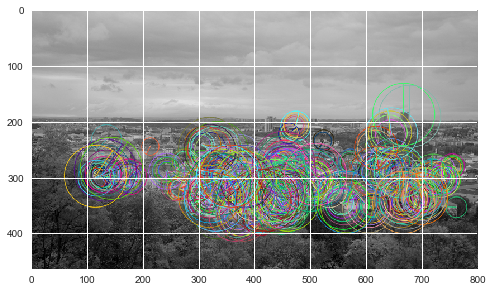

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import seaborn as sns
from time import time
from PIL import Image

img1 = cv2.cvtColor(cv2.imread('img/prague.png'), cv2.COLOR_BGR2RGB)

det = cv2.ORB_create(500)
kps1, descs1 = det.detectAndCompute(img1,None)

vis_img1 = None
vis_img1 = cv2.drawKeypoints(cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY),kps1,vis_img1, 
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(vis_img1)

In [2]:
from extract_patches import extract_patches, extract_patches_pil, patch_extract_vbalnt
# extract_patches performs extraction from the appropriate level of image pyramid, 
# removing high freq artifacts. 
# Border mode is set to "replicate", so the patch don`t have crazy black borders


('vbalnt baseline for 500 kps, [s]', 0.14632678031921387)
('pyr OpenCV version for 500 kps, [s]', 0.034619808197021484)
('pyr PIL version for 500 kps, [s]', 0.10670614242553711)
orig, cv2_py, PIL_pyr


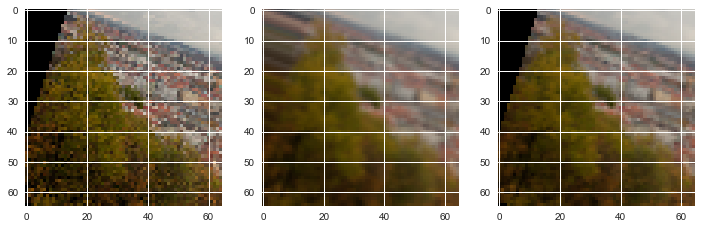

In [3]:
show_idx = 300
PATCH_SIZE = 65
mrSize = 5.0
t=time()
patches_vbalnt = patch_extract_vbalnt(kps1, img1, PATCH_SIZE, mrSize)
print ('vbalnt baseline for 500 kps, [s]', time()-t)
t=time()
patches = extract_patches(kps1, img1, PATCH_SIZE, mrSize)
print ('pyr OpenCV version for 500 kps, [s]', time()-t)
t=time()
patches_pil = extract_patches_pil(kps1, img1, PATCH_SIZE, mrSize)
print ('pyr PIL version for 500 kps, [s]', time()-t)

fig = plt.figure(figsize=(12, 16))
fig.add_subplot(1, 3, 1) 
plt.imshow(patches_vbalnt[show_idx])
fig.add_subplot(1, 3, 2) 
plt.imshow(patches[show_idx])
fig.add_subplot(1, 3, 3) 
plt.imshow(patches_pil[show_idx])
print ("orig, cv2_py, PIL_pyr")